### Question 1

In [2]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
scaler = StandardScaler()
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing and reading the dataset
df = pd.read_csv(r"C:\Users\ADMIN\Downloads\baseball.csv")
df

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12   85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13   76  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   
14   68  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   
15  100  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   
16   98  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   
17   97  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   
18   68  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1   
19   64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
20   90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   
21   83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
22   71  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   
23   67  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   
24   63  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1   
25   92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26   84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27   79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28   74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29   68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV    E  
0     8  56   88  
1    12  45   86  
2    10  38   79  
3     9  37  101  
4    12  35   86  
5    10  34   88  
6     4  48   93  
7    10  43   77  
8    12  60   95  
9    10  40   97  
10    9  45  119  
11   13  39   85  
12   12  46   93  
13   12  45   94  
14   15  28  126  
15   15  62   96  
16   13  54  122  
17   21  48  111  
18    7  40  116  
19    8  35   90  
20   14  50   88  
21   13  41   90  
22   12  35   77  
23   10  44   90  
24    7  35  117  
25   21  47   75  
26   18  41   78  
27   12  44   86  
28    6  41   92  
29    4  36   95

In [4]:
# Feature names and DatatYpes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
df.describe()

W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000  428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000  473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000  501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000  570.000000  1518.00000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   30.000000  30.000000  30.000000  30.000000  30.000000   30.000000  
mean   635.833333   3.956333   3.466667  11.300000  43.066667   94.333333  
std     70.140786   0.454089   2.763473   4.120177   7.869335   13.958889  
min    478.000000   2.940000   0.000000   4.000000  28.000000   75.000000  
25%    587.250000   3.682500   1.000000   9.000000  37.250000   86.000000  
50%    644.500000   4.025000   3.000000  12.000000  42.000000   91.000000  
75%    679.250000   4.220000   5.750000  13.000000  46.750000   96.750000  
max    799.000000   5.040000  11.000000  21.000000  62.000000  126.000000

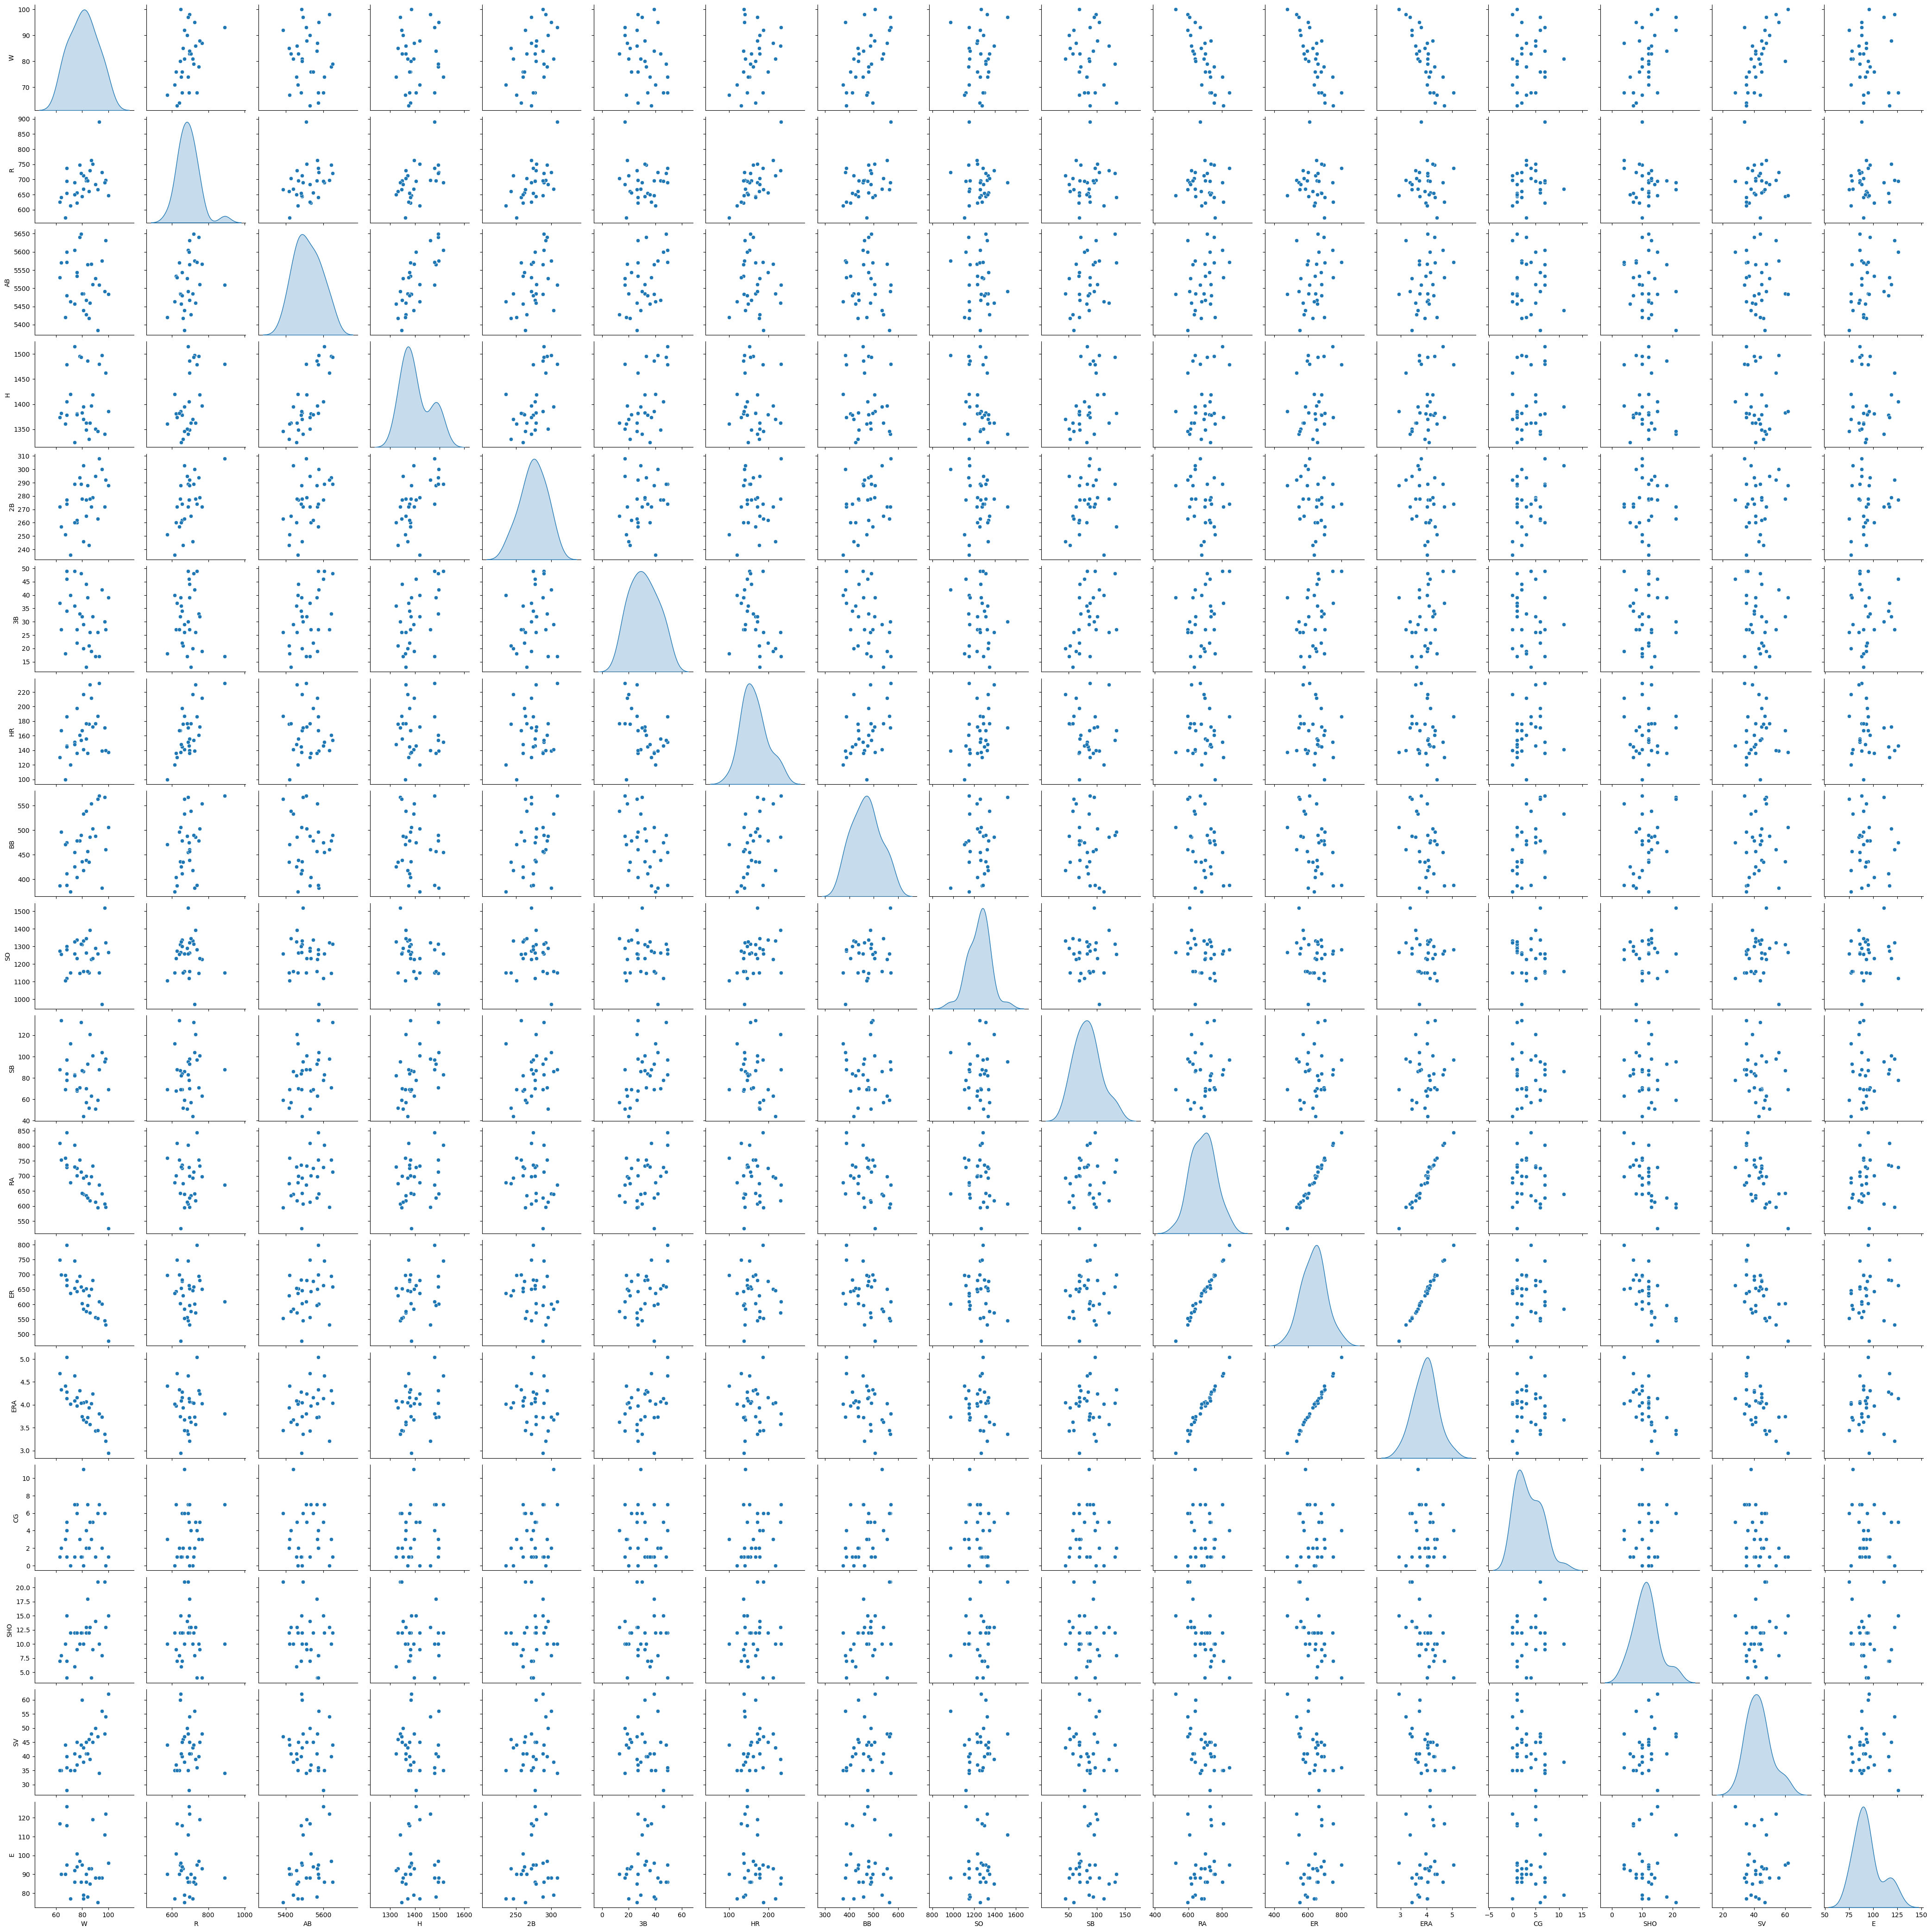

In [6]:
# Understanding the relation ship between various features using scatter plot
sns.pairplot(df,diag_kind="kde")

<Axes: >

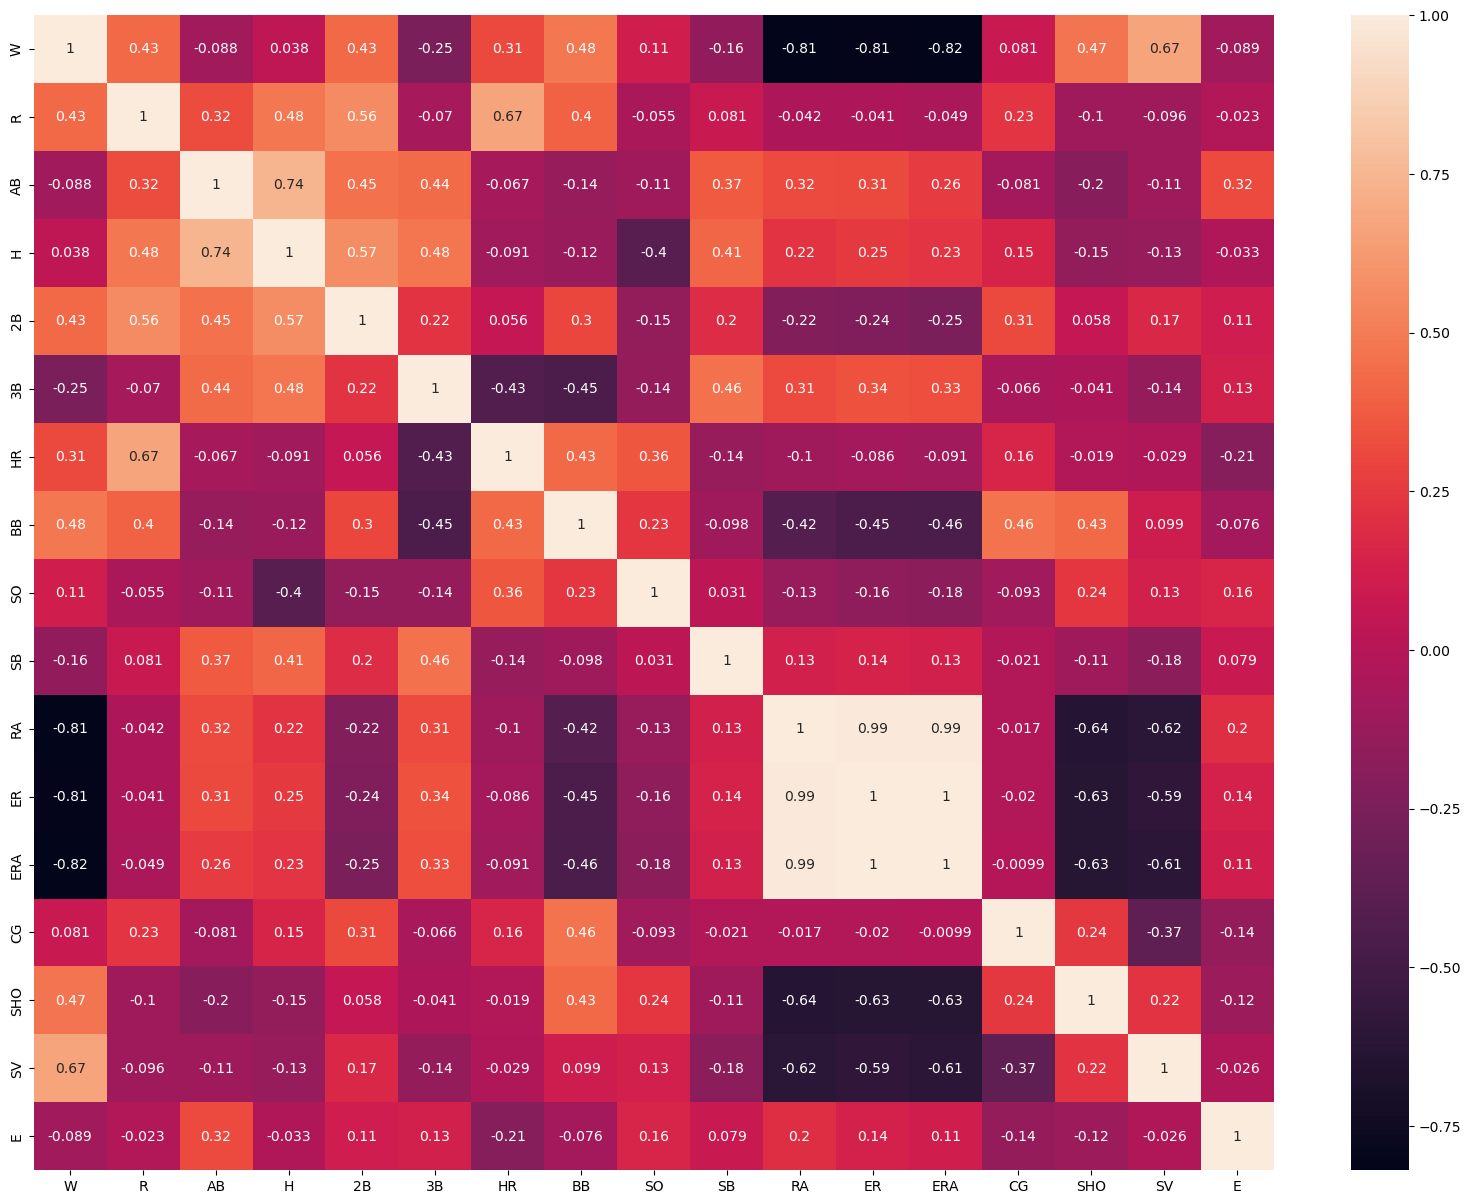

In [7]:
# Using correlation matrix
plt.figure(figsize=(20,15))
matrix= np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,)

In [8]:
# Split the data in y and x
Y = df[['W']]
X = df[['RA', 'ER', 'SV', 'SHO']]

In [9]:
# Splitting the dataset into train and test 
X_train, X_test, Y_train, Y_test=model_selection.train_test_split(X,Y,test_size=0.2,random_state=2)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
# Spot checking algorithms
models = []
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('GBM', GradientBoostingRegressor()))
models.append(('XGB', XGBRegressor()))
models.append(('RFG', RandomForestRegressor()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='explained_variance')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -1.123029 (2.851467)
LASSO: -0.340245 (1.508429)
EN: -0.088717 (1.011367)
KNN: -0.069287 (1.129577)
CART: -1.360092 (2.766900)
GBM: -0.927289 (2.757530)
XGB: -0.704388 (2.504785)
RFG: -0.617541 (2.063032)


In [11]:
best_index = results.index(max(results, key=lambda a: a.all()))
best_model_name = names[best_index]
best_model_score = results[best_index].mean()

print(f"\nBest Model: {best_model_name} with a mean score of {best_model_score:.6f}")


Best Model: LR with a mean score of -1.123029


In [12]:
# Creating Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, Y_train)
print('Traning', score)
score = model.score(X_test, Y_test)
print('Testing', score)

Traning 0.7085898578272409
Testing 0.5599992825843976


In [13]:
# Mean Absolute Error
mae = np.round(mean_absolute_error(Y_test,Y_pred),3)
mae

6.23

In [14]:
# Mean Squared Error
mse = np.round(mean_squared_error(Y_test,Y_pred),3)
mse

46.457

In [15]:
#  R2 Score
score = np.round(r2_score(Y_test,Y_pred),3)
score

0.56

### Question 2

In [17]:
# Importing all the necessary libraries
import pandas as pd
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sweetviz as sv
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [18]:
df= pd.read_csv(r'C:\Users\ADMIN\Desktop\avocado.csv')

In [19]:
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [20]:
df.shape

(18249, 14)

In [21]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [22]:
df.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [24]:
# Generate descriptive statistics for all columns and which have missing values
df.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

In [25]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [26]:
report = sv.analyze(df)
report.show_html("avocado_before_preprocessing.html")

                                             |                                             | [  0%]   00:00 ->…

Report avocado_before_preprocessing.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [27]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [28]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [29]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [30]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  Month  Day  
0  Albany     12   27  
1  Albany     12   20  
2  Albany     12   13  
3  Albany     12    6  
4  Albany     11   29

In [31]:
Type=df.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

<Axes: xlabel='AveragePrice'>

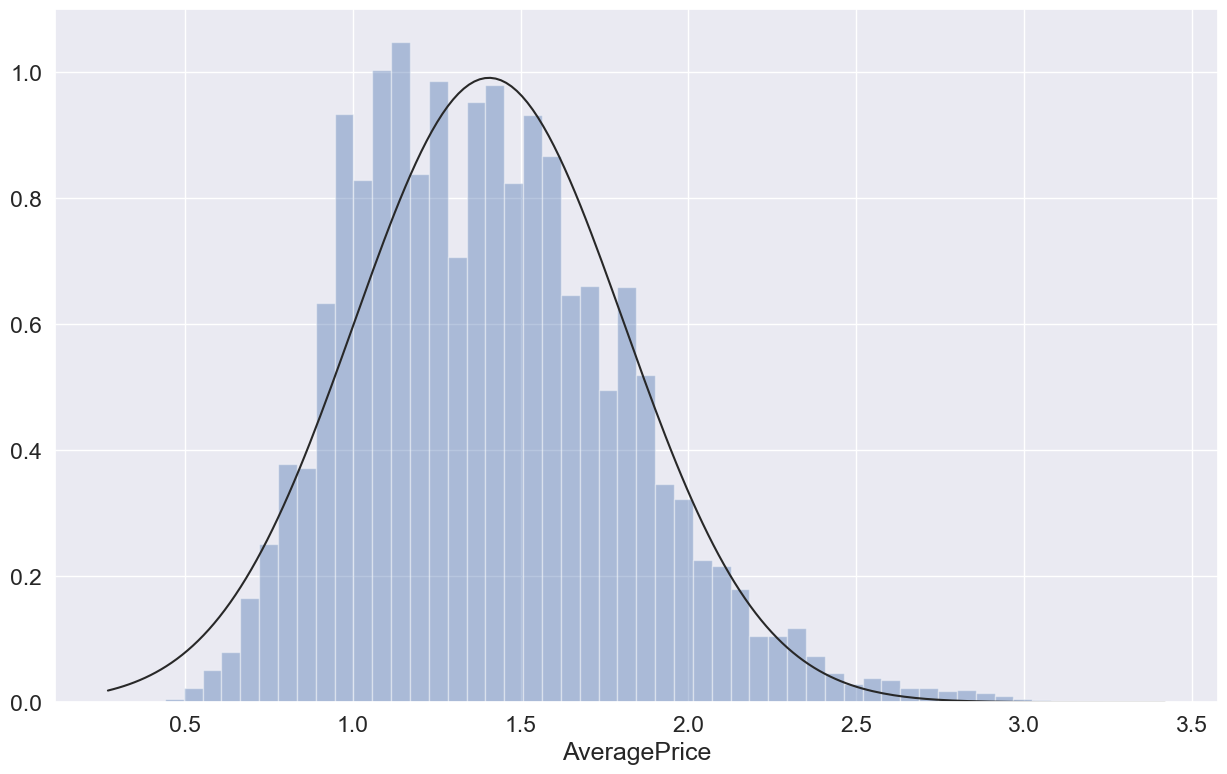

In [32]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

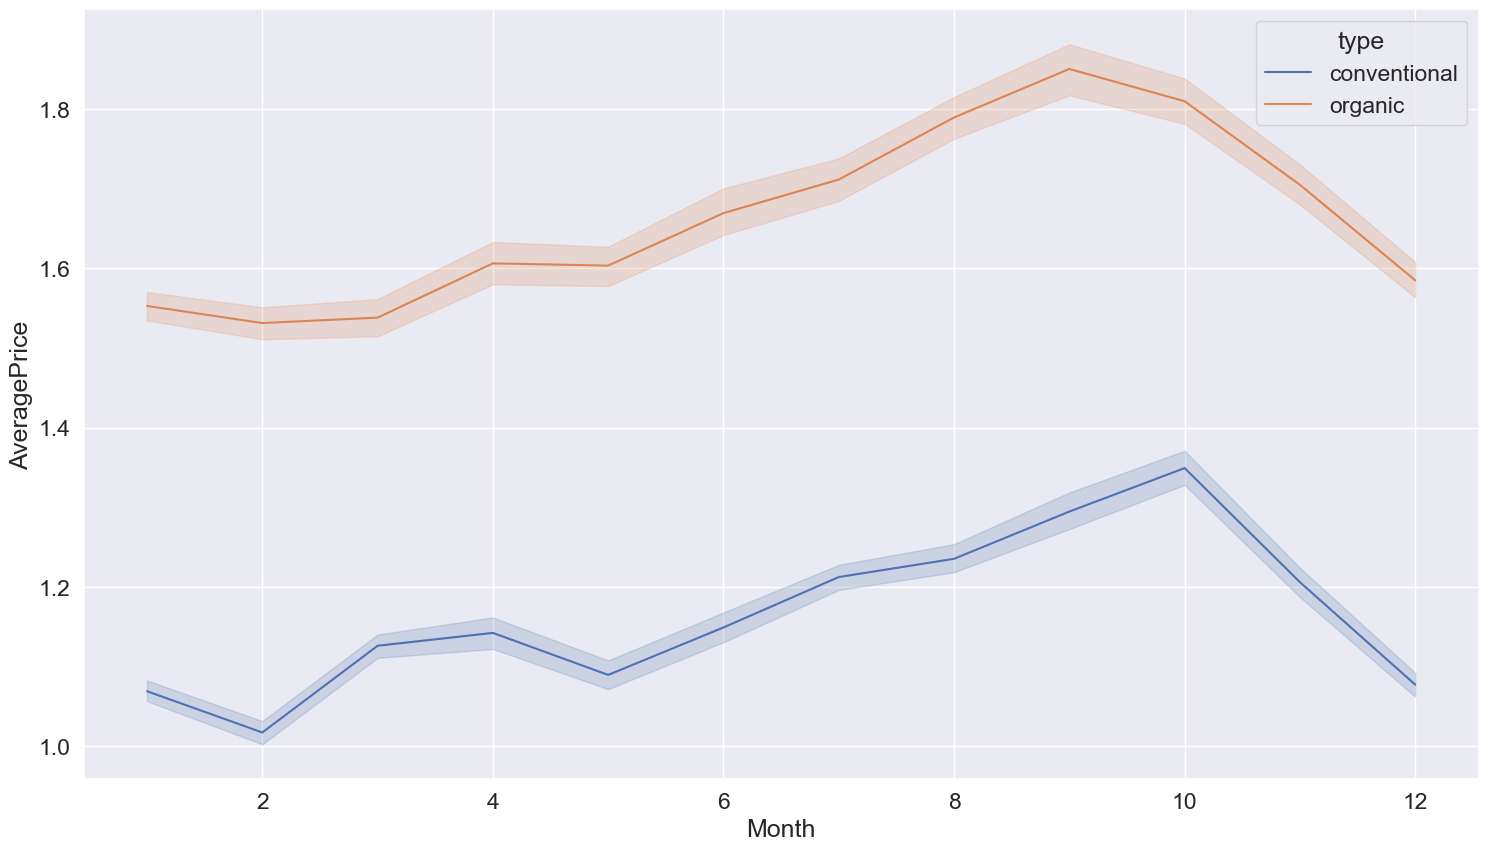

In [33]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

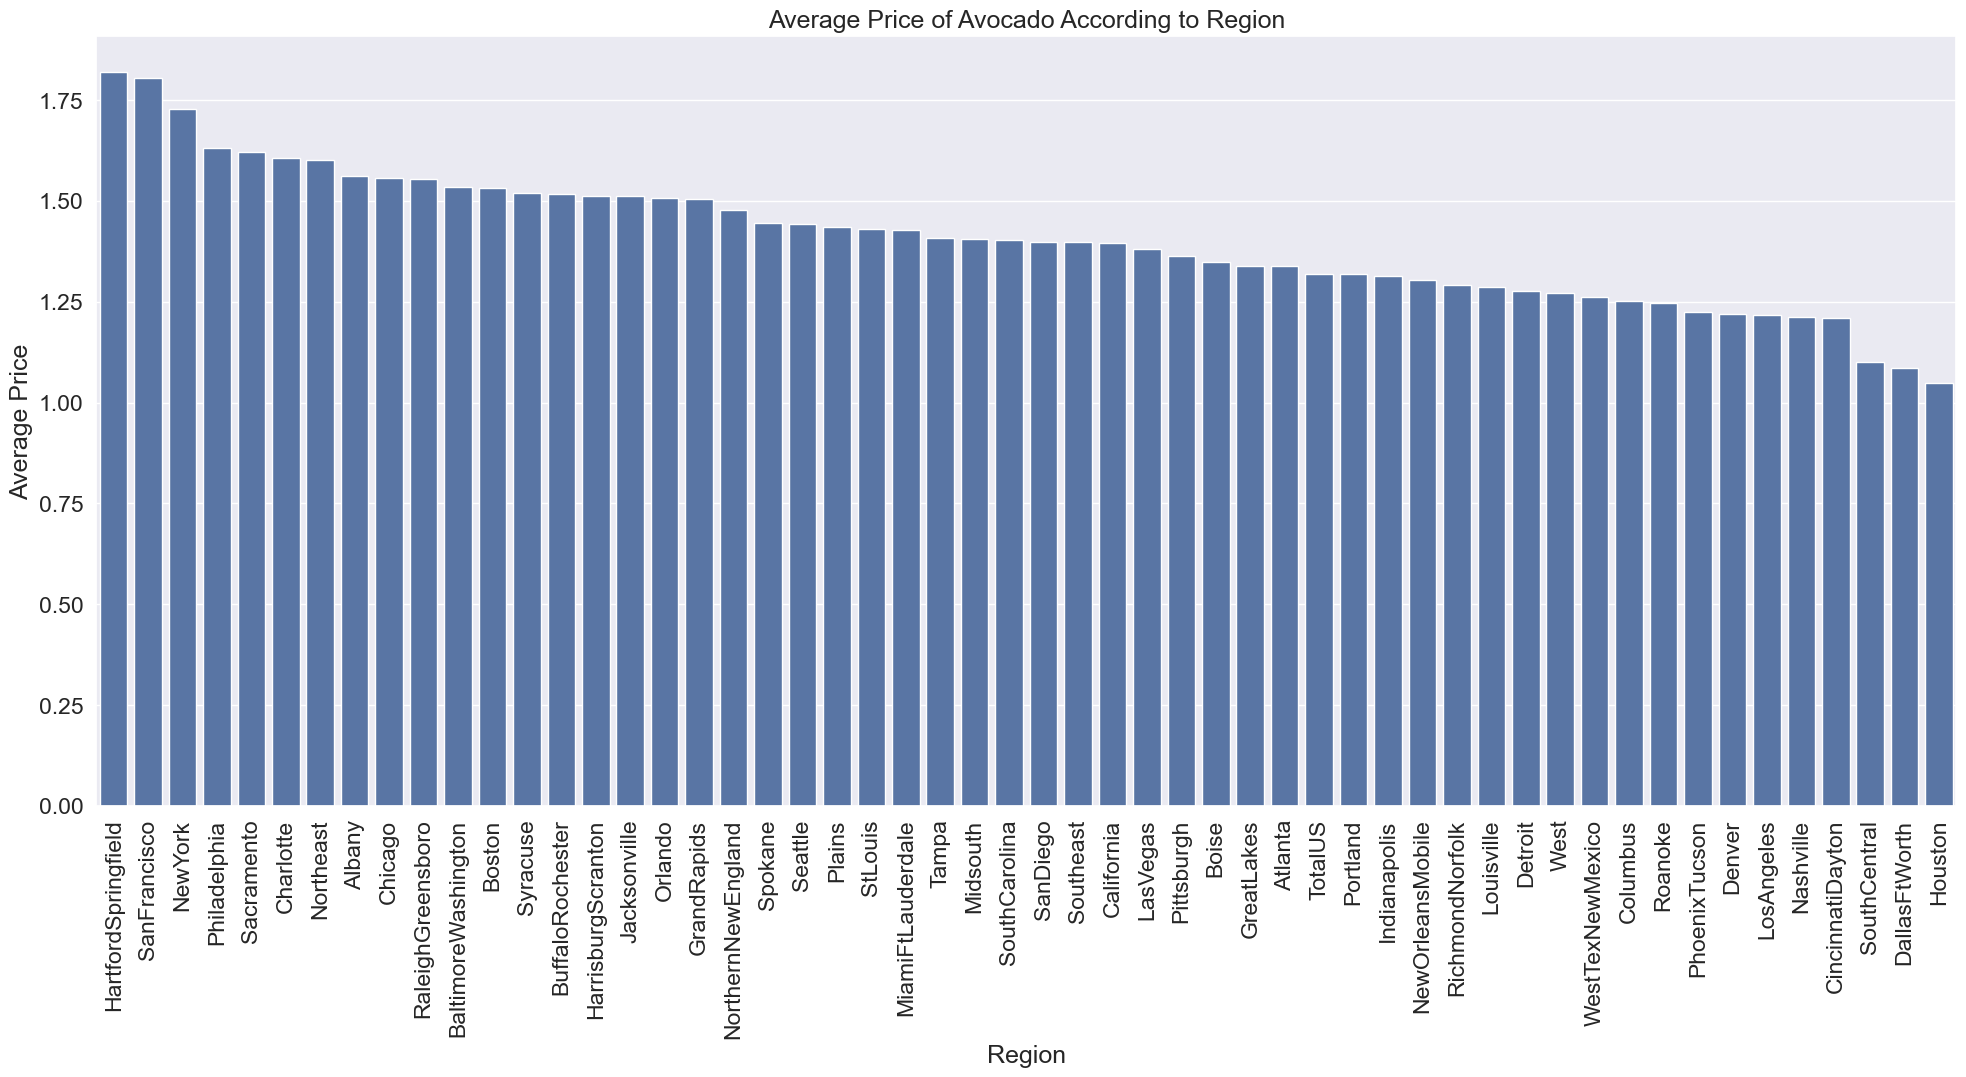

In [34]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Text(0.5, 1.0, 'Average of Total Volume According to Region')

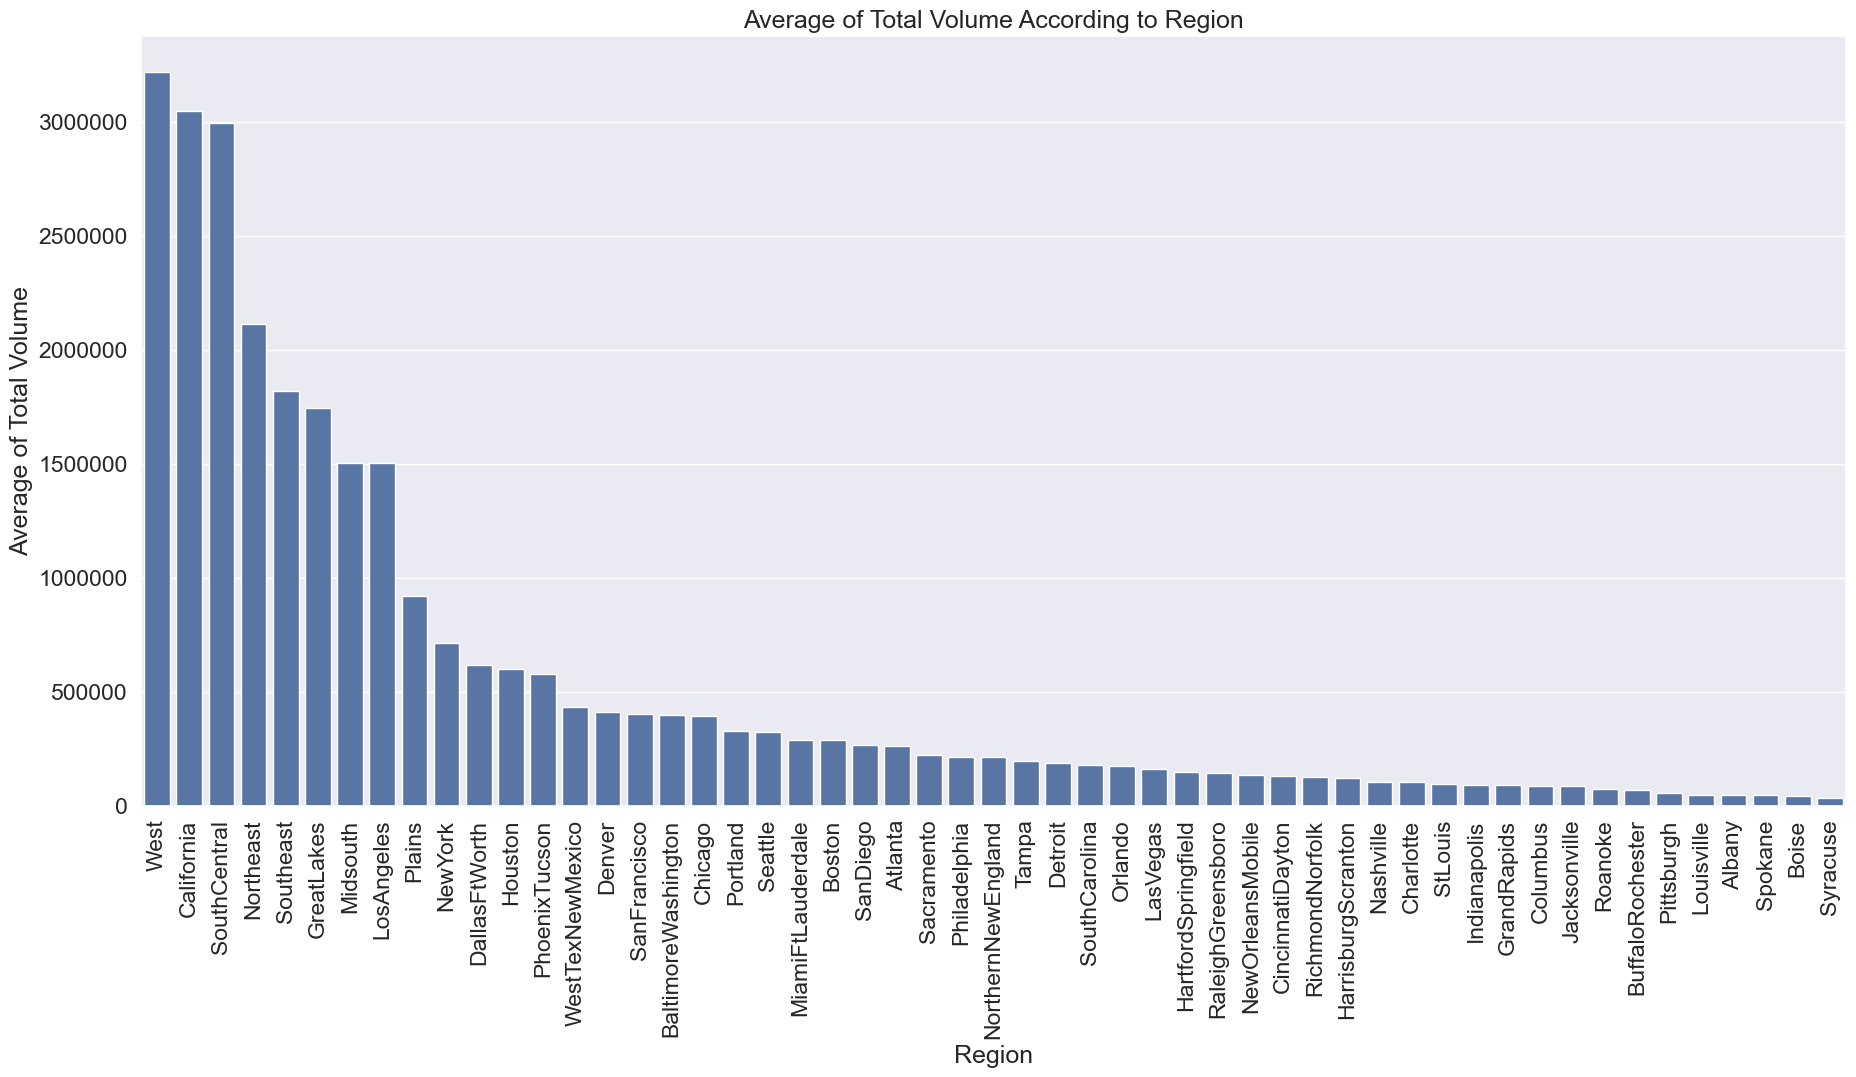

In [35]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

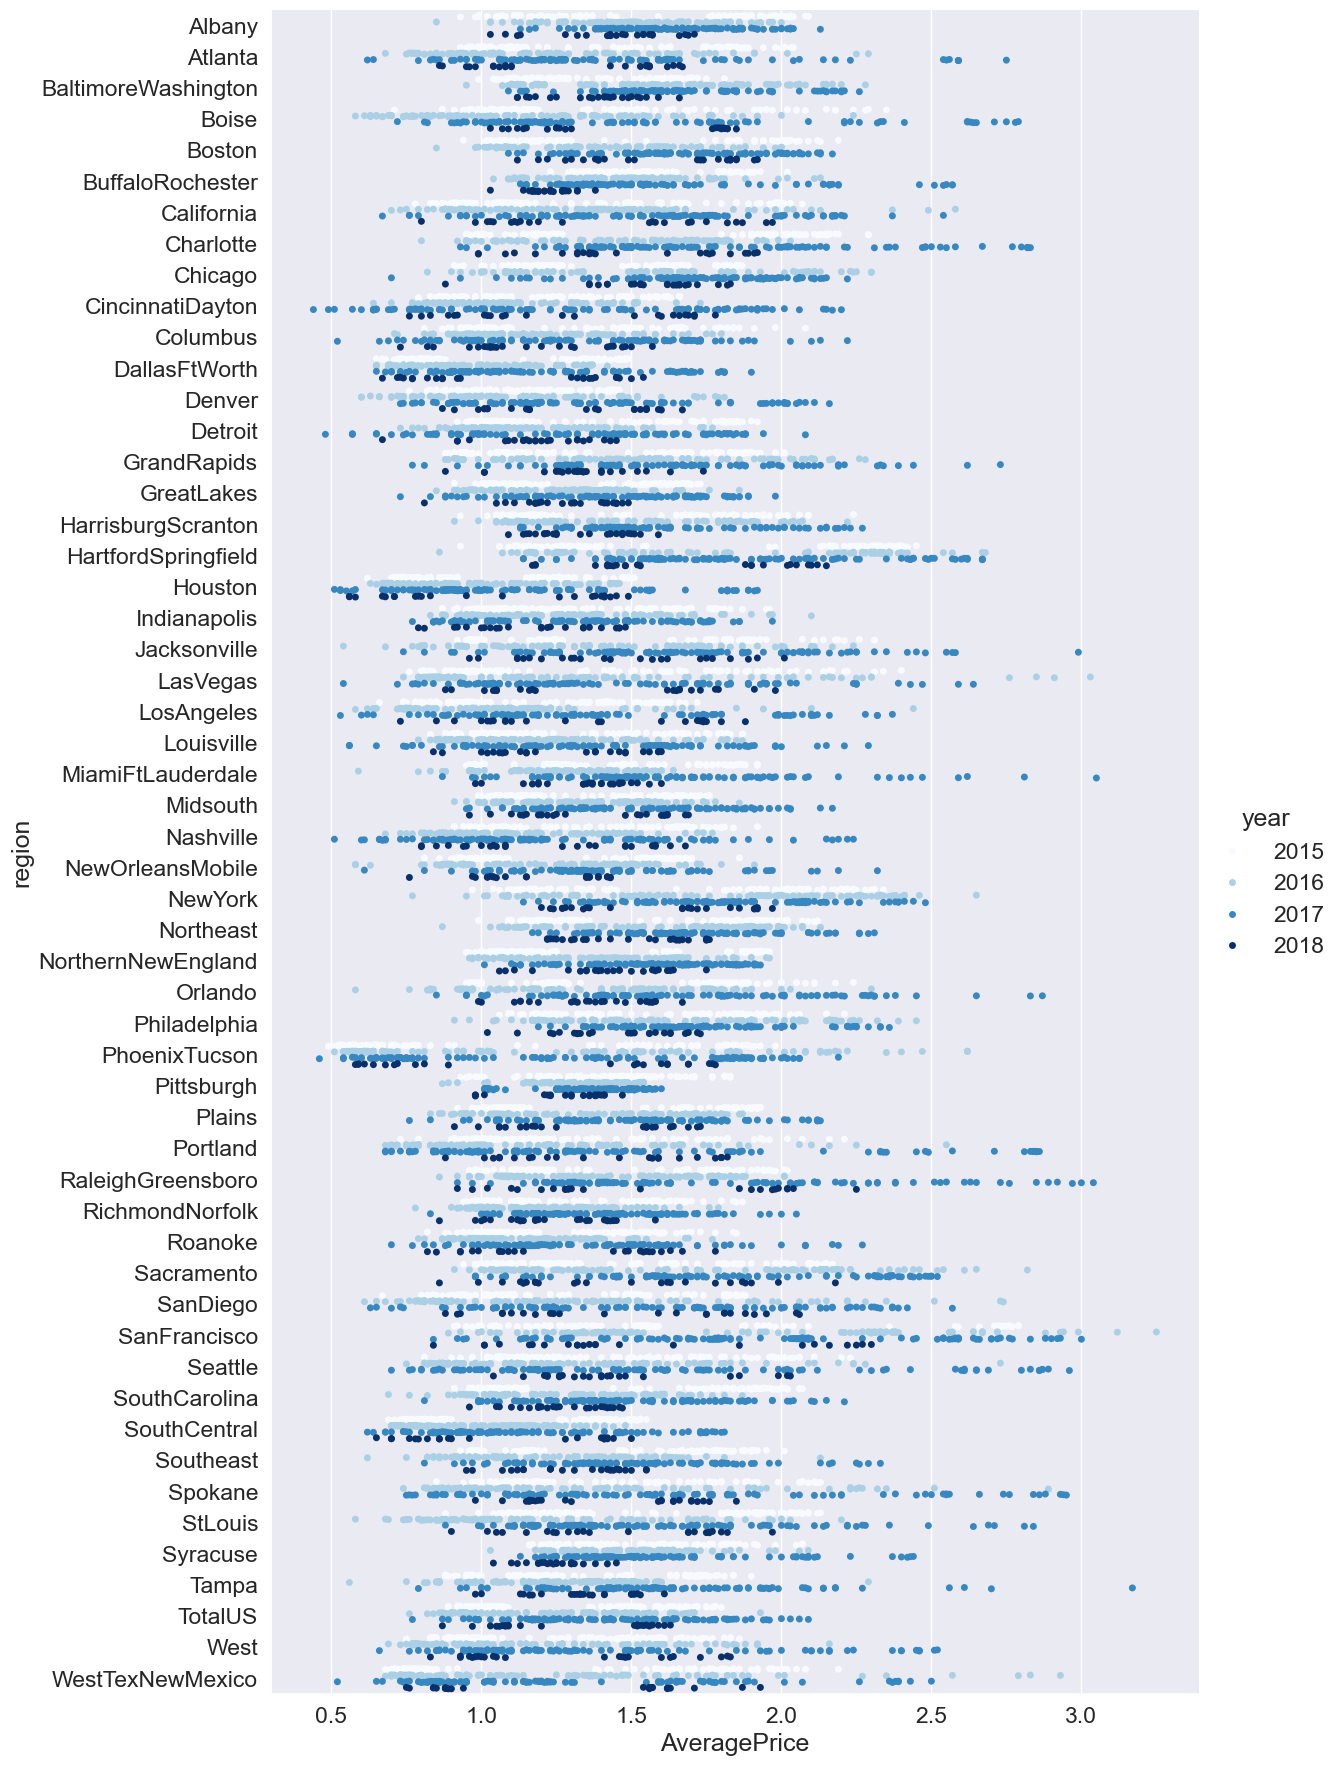

In [36]:
g = sns.catplot(
    x='AveragePrice',
    y='region',
    data=df,
    hue='year',
    height=18,
    aspect=0.7,
    palette='Blues',
    kind='strip',  # You can use 'strip' or other kinds like 'point', 'bar', etc.
    dodge=True
)

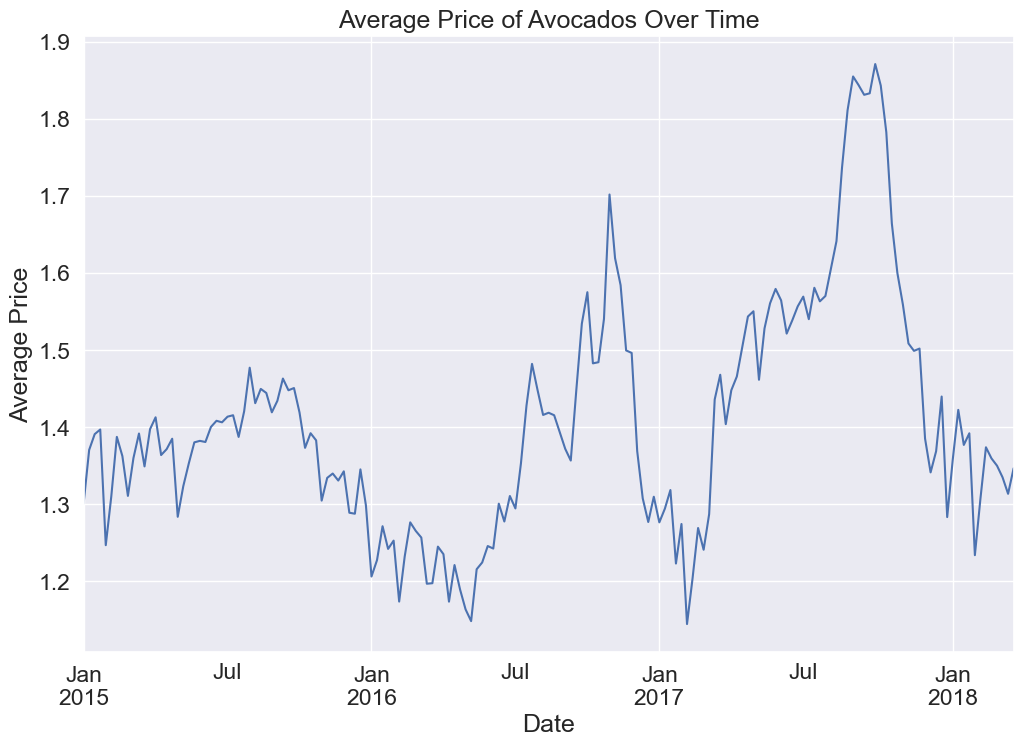

In [37]:
numeric_df = df.select_dtypes(include=['number'])
byDate = numeric_df.groupby(df['Date']).mean()

# Plot the 'AveragePrice' over time
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price of Avocados Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

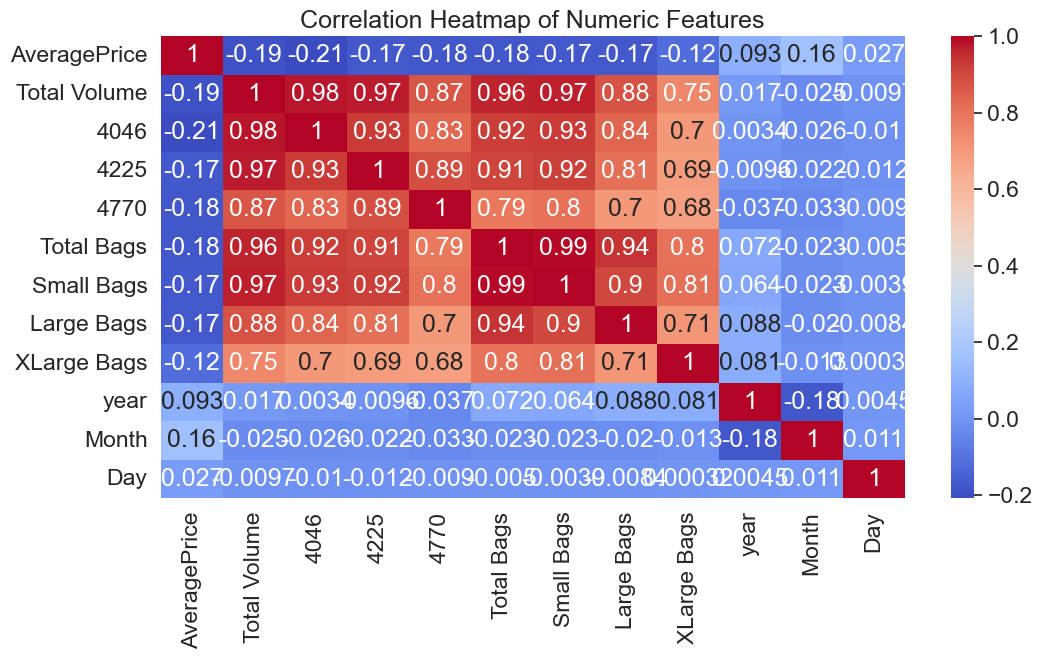

In [38]:
# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [39]:
df['region'].nunique()

54

In [40]:
df['type'].nunique()

2

In [41]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)
df_final.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  year  Month  Day  type_organic  
0     8603.62       93.25          0.0  2015     12   27         False  
1     9408.07       97.49          0.0  2015     12   20         False  
2     8042.21      103.14          0.0  2015     12   13         False  
3     5677.40      133.76          0.0  2015     12    6         False  
4     5986.26      197.69          0.0  2015     11   29         False

In [42]:
df_final.tail()

AveragePrice  Total Volume     4046     4225    4770  Total Bags  \
18244          1.63      17074.83  2046.96  1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70  3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92  2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63  2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77  2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  year  Month  Day  type_organic  
18244    13066.82      431.85          0.0  2018      2    4          True  
18245     8940.04      324.80          0.0  2018      1   28          True  
18246     9351.80       42.31          0.0  2018      1   21          True  
18247    10919.54       50.00          0.0  2018      1   14          True  
18248    11988.14       26.01          0.0  2018      1    7          True

In [43]:
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.2329713329168993
MSE: 0.09108802805359524
RMSE: 0.3018079323901134


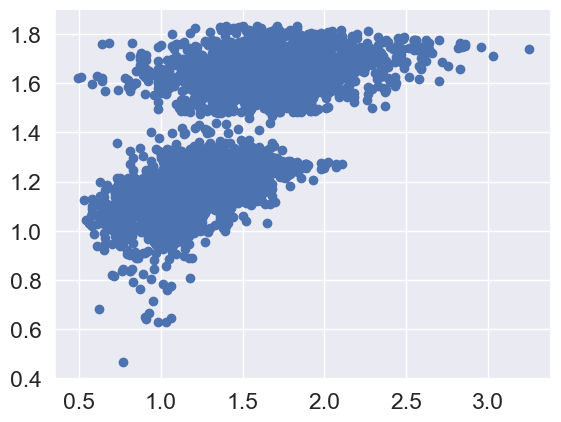

In [46]:
plt.scatter(x=y_test,y=pred)

In [47]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

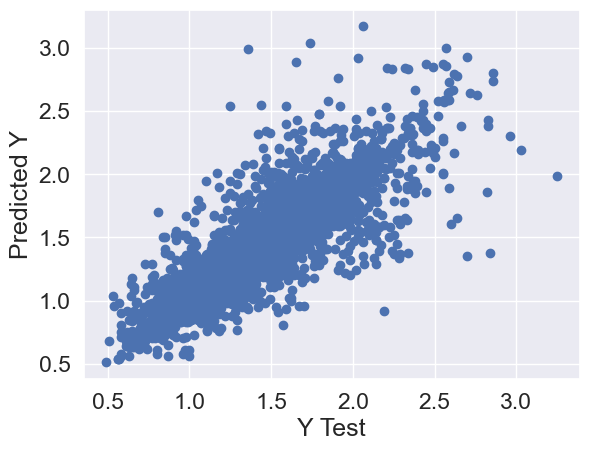

In [48]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.13535068493150684
MSE: 0.045078712328767125
RMSE: 0.21231748003583484


In [50]:
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10053317808219178
MSE: 0.021283835652054786
RMSE: 0.14588980653923284


<Axes: xlabel='AveragePrice', ylabel='Density'>

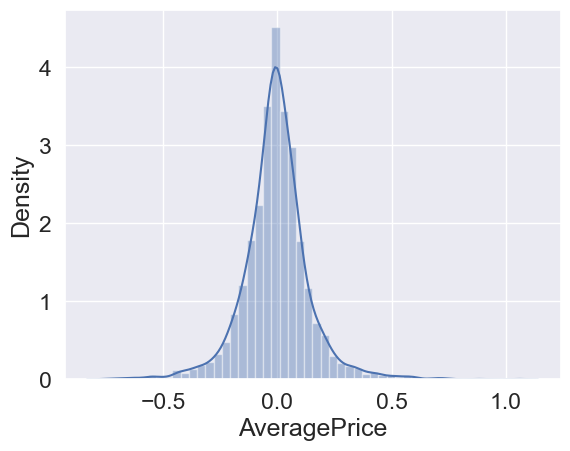

In [52]:
sns.distplot((y_test-pred),bins=50)

Y Test    Pred
8604     0.82  0.9497
2608     0.97  0.9812
14581    1.44  1.4115
4254     0.97  0.8964
16588    1.45  1.4403

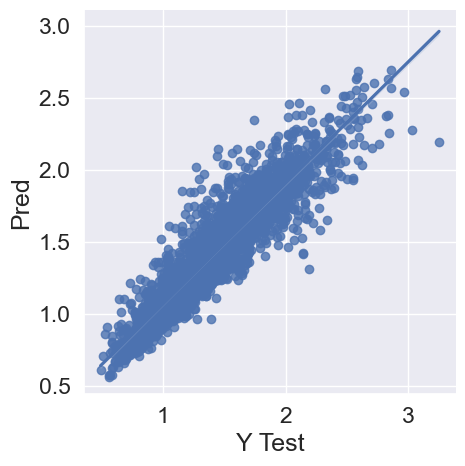

In [53]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

### Question 3

In [55]:
# Importing all the necessary libraries
import numpy as np 
import pandas as pd
import datetime as dt
import seaborn as sns
import io

import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_columns', None)
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, precision_score, classification_report, average_precision_score
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
sns.set_theme(style="darkgrid")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import roc_curve, roc_auc_score
import statsmodels.api as sm
import statsmodels.api as sm


In [56]:
df = pd.read_csv(r'C:\Users\ADMIN\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [57]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [58]:
df.Attrition = df.Attrition.map({'Yes':1, 'No':0})

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [60]:
df.shape

(1470, 35)

In [61]:
df.size

51450

In [62]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [63]:
df.describe()

Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.161224   802.485714          9.192517     2.912925   
std       9.135373     0.367863   403.509100          8.106864     1.024165   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   802.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  \
count         1470.0     1470.000000              1470.000000  1470.000000   
mean             1.0     1024.865306                 2.721769    65.891156   
std              0.0      602.024335                 1.093082    20.329428   
min              1.0        1.000000                 1.000000    30.000000   
25%              1.0      491.250000                 2.000000    48.000000   
50%              1.0     1020.500000                 3.000000    66.000000   
75%              1.0     1555.750000                 4.000000    83.750000   
max              1.0     2068.000000                 4.000000   100.000000   

       JobInvolvement     JobLevel  JobSatisfaction  MonthlyIncome  \
count     1470.000000  1470.000000      1470.000000    1470.000000   
mean         2.729932     2.063946         2.728571    6502.931293   
std          0.711561     1.106940         1.102846    4707.956783   
min          1.000000     1.000000         1.000000    1009.000000   
25%          2.000000     1.000000         2.000000    2911.000000   
50%          3.000000     2.000000         3.000000    4919.000000   
75%          3.000000     3.000000         4.000000    8379.000000   
max          4.000000     5.000000         4.000000   19999.000000   

        MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count   1470.000000         1470.000000        1470.000000        1470.000000   
mean   14313.103401            2.693197          15.209524           3.153741   
std     7117.786044            2.498009           3.659938           0.360824   
min     2094.000000            0.000000          11.000000           3.000000   
25%     8047.000000            1.000000          12.000000           3.000000   
50%    14235.500000            2.000000          14.000000           3.000000   
75%    20461.500000            4.000000          18.000000           3.000000   
max    26999.000000            9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsA

In [64]:
df.groupby(["Attrition"]).size()

Attrition
0    1233
1     237
dtype: int64

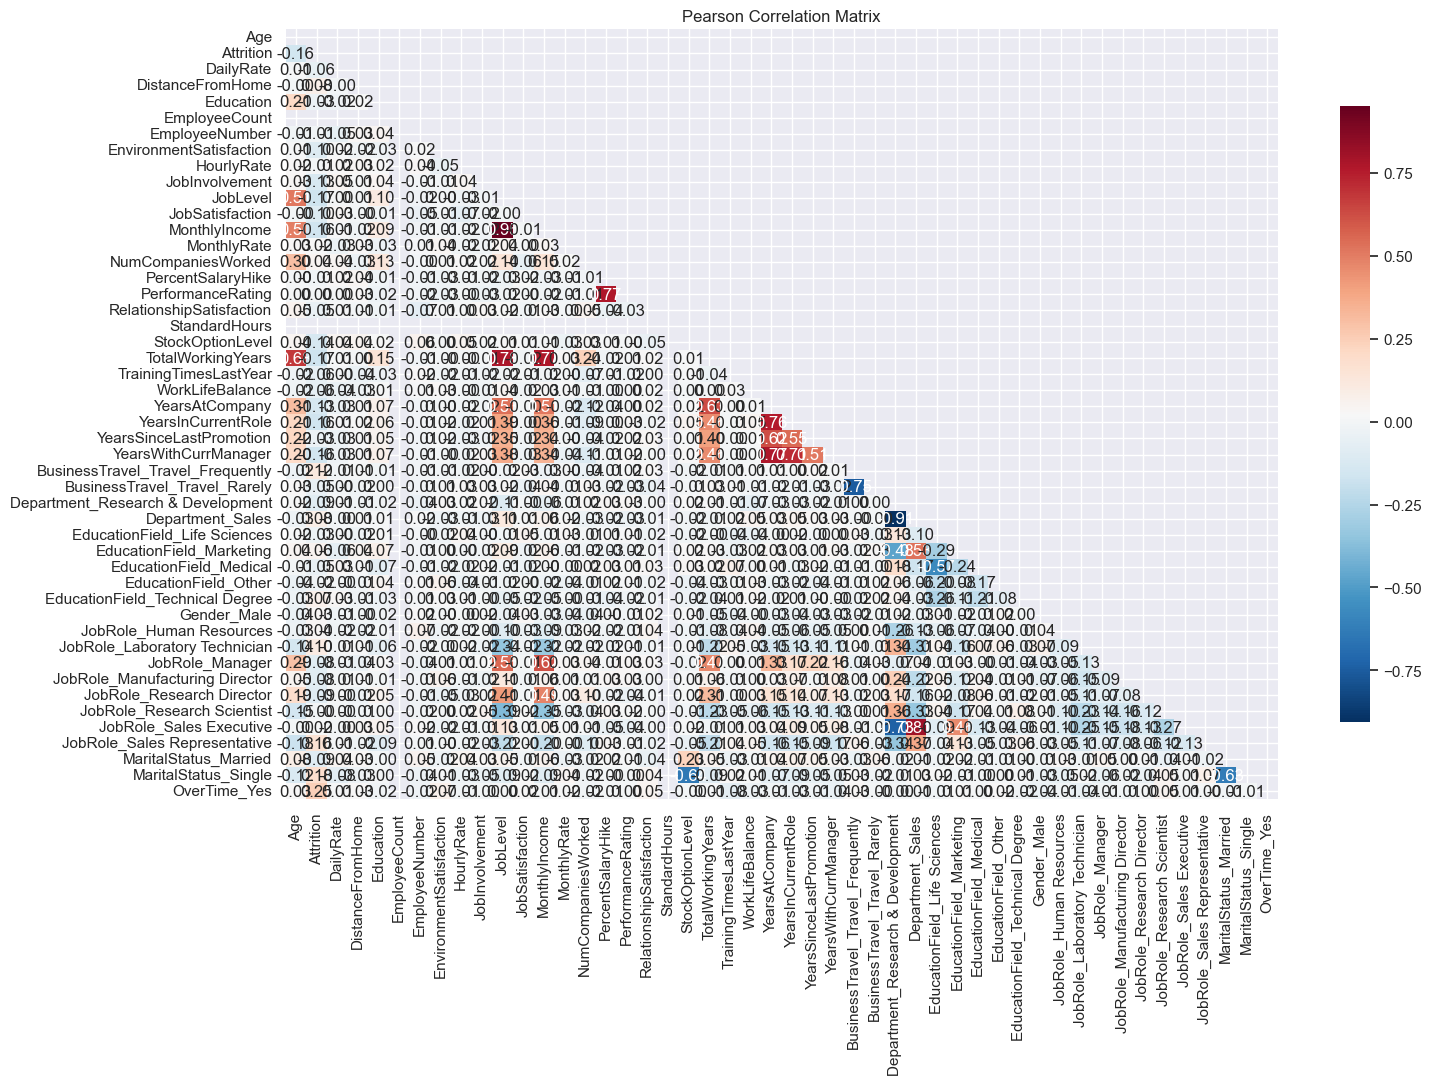

In [65]:
non_numeric_columns = df.select_dtypes(include=['object']).columns

df_encoded = pd.get_dummies(df, drop_first=True)
pearson = df_encoded.corr(method='pearson')
pearson
plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(pearson, dtype=bool))
sns.heatmap(pearson, annot=True, cmap='RdBu_r', fmt='.2f', mask=mask, cbar_kws={'shrink': .8})
plt.title('Pearson Correlation Matrix')
plt.show()

In [66]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Number of Attritions Reported by Education Field')

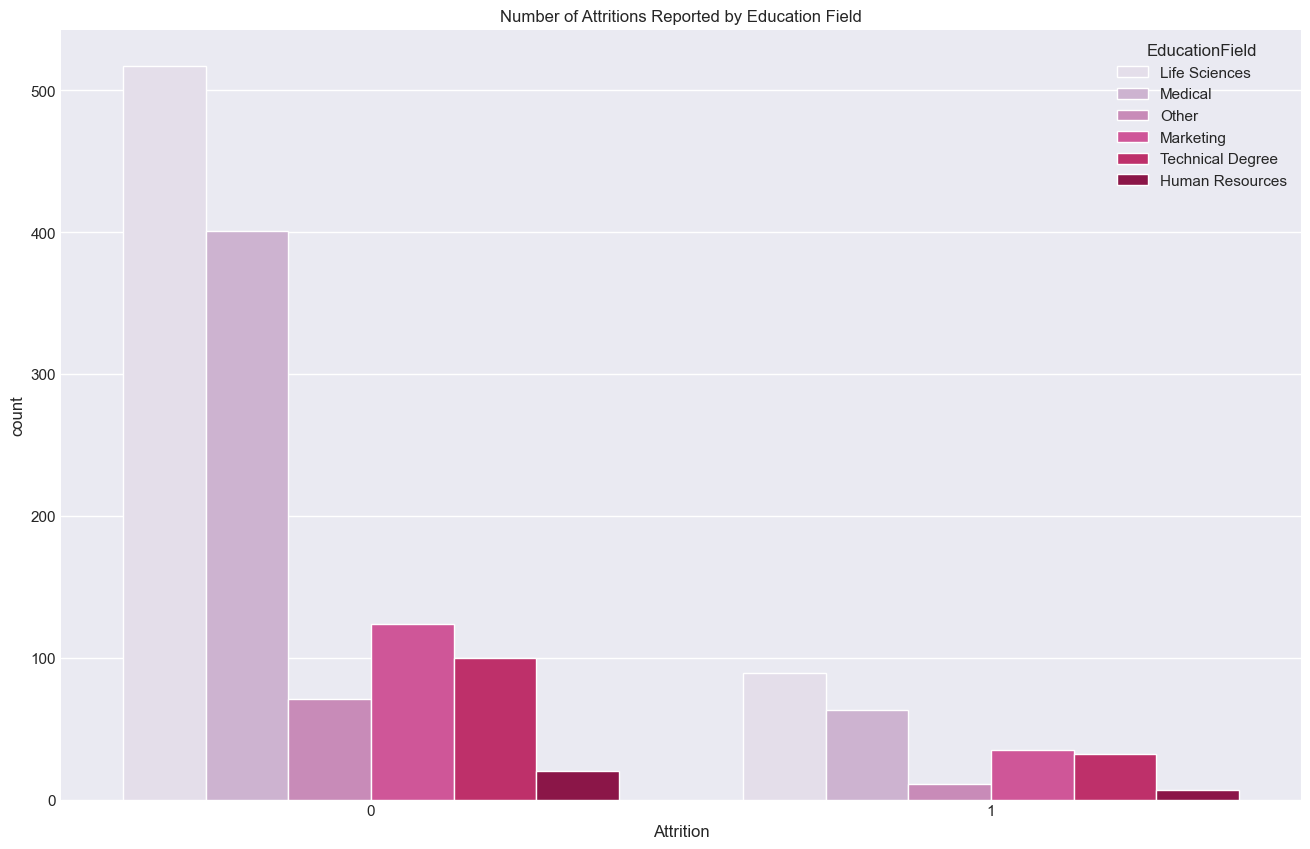

In [67]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (16, 10)

sns.countplot(x=df['Attrition'],hue='EducationField',data=df, palette = 'PuRd').set_title("Number of Attritions Reported by Education Field")

In [68]:
df[(df["Attrition"] == 1)].groupby(["EducationField"]).size() / df.groupby(["EducationField"]).size()

EducationField
Human Resources     0.259259
Life Sciences       0.146865
Marketing           0.220126
Medical             0.135776
Other               0.134146
Technical Degree    0.242424
dtype: float64

In [69]:
df[(df["Attrition"] == 1)].groupby(["EducationField"]).size()

EducationField
Human Resources      7
Life Sciences       89
Marketing           35
Medical             63
Other               11
Technical Degree    32
dtype: int64

In [70]:
df[(df["Attrition"] == 0)].groupby(["EducationField"]).size()

EducationField
Human Resources      20
Life Sciences       517
Marketing           124
Medical             401
Other                71
Technical Degree    100
dtype: int64

Text(0.5, 1.0, 'Number of Attritions Reported by Over Time')

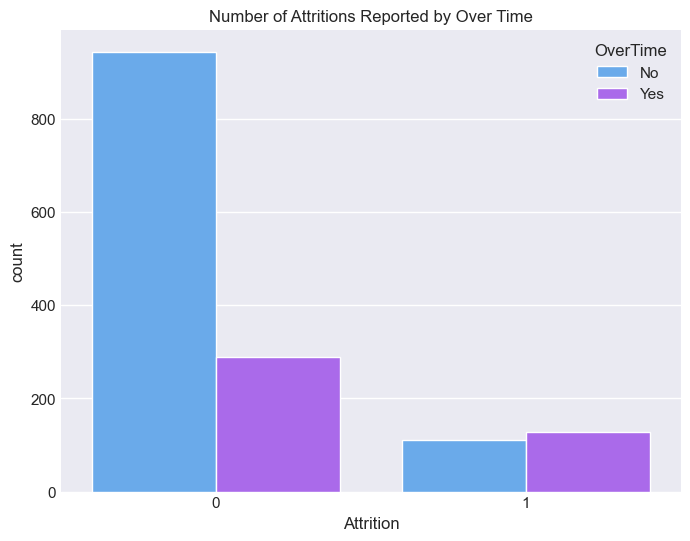

In [71]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='OverTime',data=df, palette = 'cool').set_title("Number of Attritions Reported by Over Time")

Text(0.5, 1.0, 'Number of Attritions Reported by Job Roles')

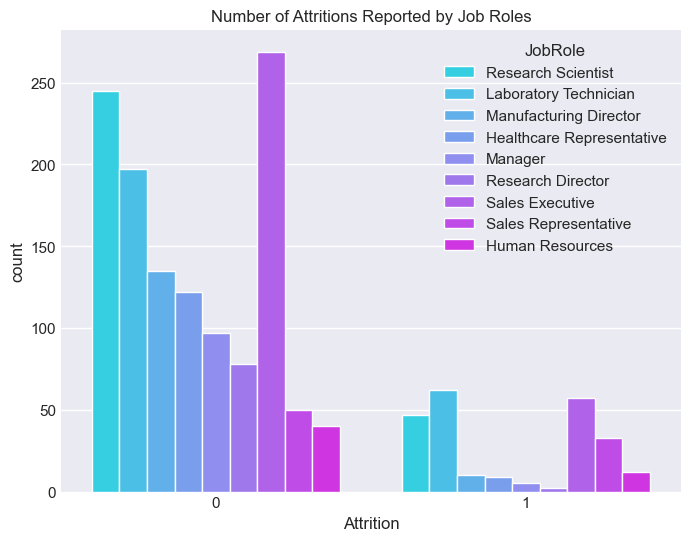

In [72]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='JobRole',data=df, palette = 'cool').set_title("Number of Attritions Reported by Job Roles")

In [73]:
df[(df["Attrition"] == 1)].groupby(["OverTime"]).size() / df.groupby(["OverTime"]).size()

OverTime
No     0.104364
Yes    0.305288
dtype: float64

Text(0.5, 1.0, 'Number of Attritions Reported by Amount of Business Travel')

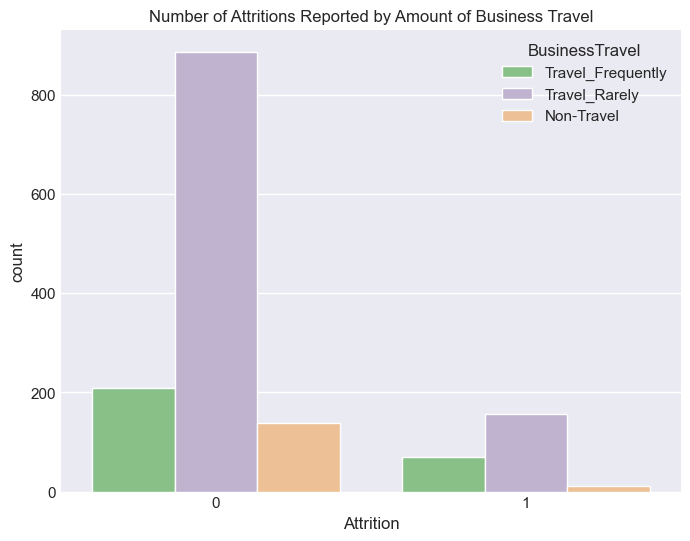

In [74]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='BusinessTravel',data=df, palette = 'Accent').set_title("Number of Attritions Reported by Amount of Business Travel")

In [75]:
df[(df["Attrition"] == 1)].groupby(["BusinessTravel"]).size() / df.groupby(["BusinessTravel"]).size()

BusinessTravel
Non-Travel           0.080000
Travel_Frequently    0.249097
Travel_Rarely        0.149569
dtype: float64

Text(0.5, 1.0, 'Number of Attritions Reported by Gender')

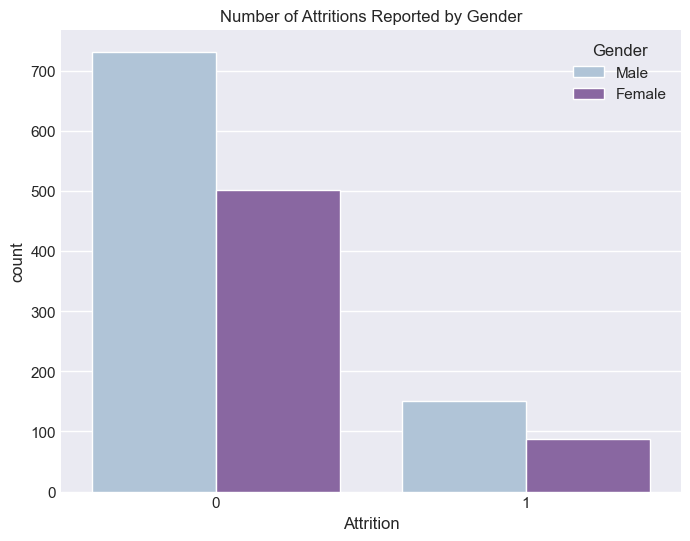

In [76]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='Gender',data=df, palette = 'BuPu').set_title("Number of Attritions Reported by Gender")

In [77]:
df[(df["Attrition"] == 1)].groupby(["Gender"]).size() / df.groupby(["Gender"]).size()

Gender
Female    0.147959
Male      0.170068
dtype: float64

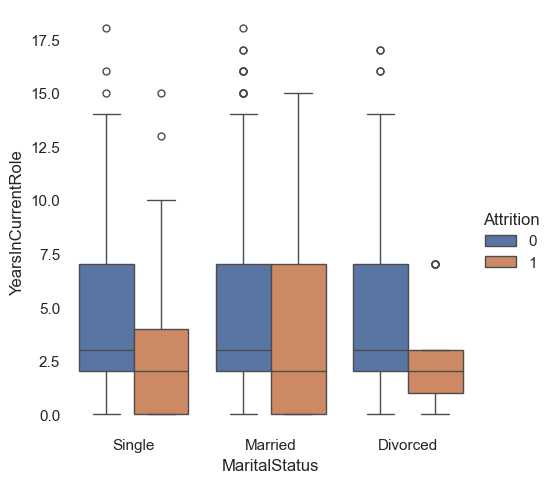

In [78]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="MaritalStatus", y="YearsInCurrentRole", hue="Attrition", data=df, kind="box")

Text(0.5, 1.0, 'Number of Attritions Reported by Marital Status')

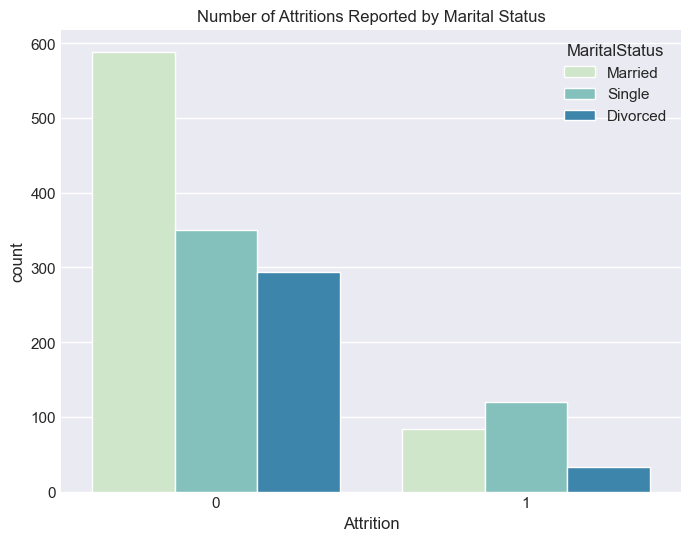

In [79]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='MaritalStatus',data=df, palette = 'GnBu').set_title("Number of Attritions Reported by Marital Status")

In [80]:
df[(df["Attrition"] == 1)].groupby(["MaritalStatus"]).size() / df.groupby(["MaritalStatus"]).size()

MaritalStatus
Divorced    0.100917
Married     0.124814
Single      0.255319
dtype: float64

In [81]:
df[(df["Attrition"] == 1)].groupby(["JobRole"]).size() / df.groupby(["JobRole"]).size()

JobRole
Healthcare Representative    0.068702
Human Resources              0.230769
Laboratory Technician        0.239382
Manager                      0.049020
Manufacturing Director       0.068966
Research Director            0.025000
Research Scientist           0.160959
Sales Executive              0.174847
Sales Representative         0.397590
dtype: float64

In [82]:
df2 = df.copy()

In [83]:
def numericizer(df, col, new_df_name):
  new_df_name = df[[col,'Attrition']].groupby([col],as_index = False).mean().sort_values(by = 'Attrition', ascending = False)
  df[col] = df[col].replace(new_df_name[col].values, 1 - new_df_name['Attrition'].values)
  new_df_name = None

lets_use_correlation = ['BusinessTravel', 'Department', 'EducationField',
                        'JobRole', 'MaritalStatus']

for i in lets_use_correlation:
  try:
    numericizer(df2, i, "blah")
  except: 
    print(i)
df2

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1        0.850431       1102    0.793722                 1   
1      49          0        0.750903        279    0.861602                 8   
2      37          1        0.850431       1373    0.861602                 2   
3      33          0        0.750903       1392    0.861602                 3   
4      27          0        0.850431        591    0.861602                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0        0.750903        884    0.861602                23   
1466   39          0        0.850431        613    0.861602                 6   
1467   27          0        0.850431        155    0.861602                 4   
1468   49          0        0.750903       1023    0.793722                 2   
1469   34          0        0.850431        628    0.861602                 8   

      Education  EducationField  EmployeeCount  EmployeeNumber  \
0             2        0.853135              1               1   
1             1        0.853135              1               2   
2             2        0.865854              1               4   
3             4        0.853135              1               5   
4             1        0.864224              1               7   
...         ...             ...            ...             ...   
1465          2        0.864224              1            2061   
1466          1        0.864224              1            2062   
1467          3        0.853135              1            2064   
1468          3        0.864224              1            2065   
1469          3        0.864224              1            2068   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                           2  Female          94               3         2   
1                           3    Male          61               2         2   
2                           4    Male          92               2         1   
3                           4  Female          56               3         1   
4                           1    Male          40               3         1   
...                       ...     ...         ...             ...       ...   
1465                        3    Male          41               4         2   
1466                        4    Male          42               2         3   
1467                        2    Male          87               4         2   
1468                        4    Male          63               2         2   
1469                        2    Male          82               4         2   

       JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  \
0     0.825153                4       0.744681           5993        19479   
1     0.839041                2       0.875186           5130        24907   
2     0.760618                3       0.744681           2090         2396   
3     0.839041                3       0.875186           2909        23159   
4     0.760618                2       0.875186           3468        16632   
...        ...              ...            ...            ...          ...   
1465  0.760618                4       0.875186           2571        12290   
1466  0.931298                1       0.875186           9991        21457   
1467  0.931034                2       0.875186           6142         5174   
1468  0.825153                2       0.875186           5390        13243   
1469  0.760618                3       0.875186           4404        10228   

      NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0                      8      Y      Yes                 11   
1                      1      Y       No                 23   
2                      6      Y      Yes                 15   
3                      1      Y      Yes                 11   
4                      9      Y       N

In [84]:
df2.Gender = df.Gender.map({'Male':1, 'Female':0})
df2.OverTime = df.OverTime.map({'Yes':1, 'No':0})

<Axes: >

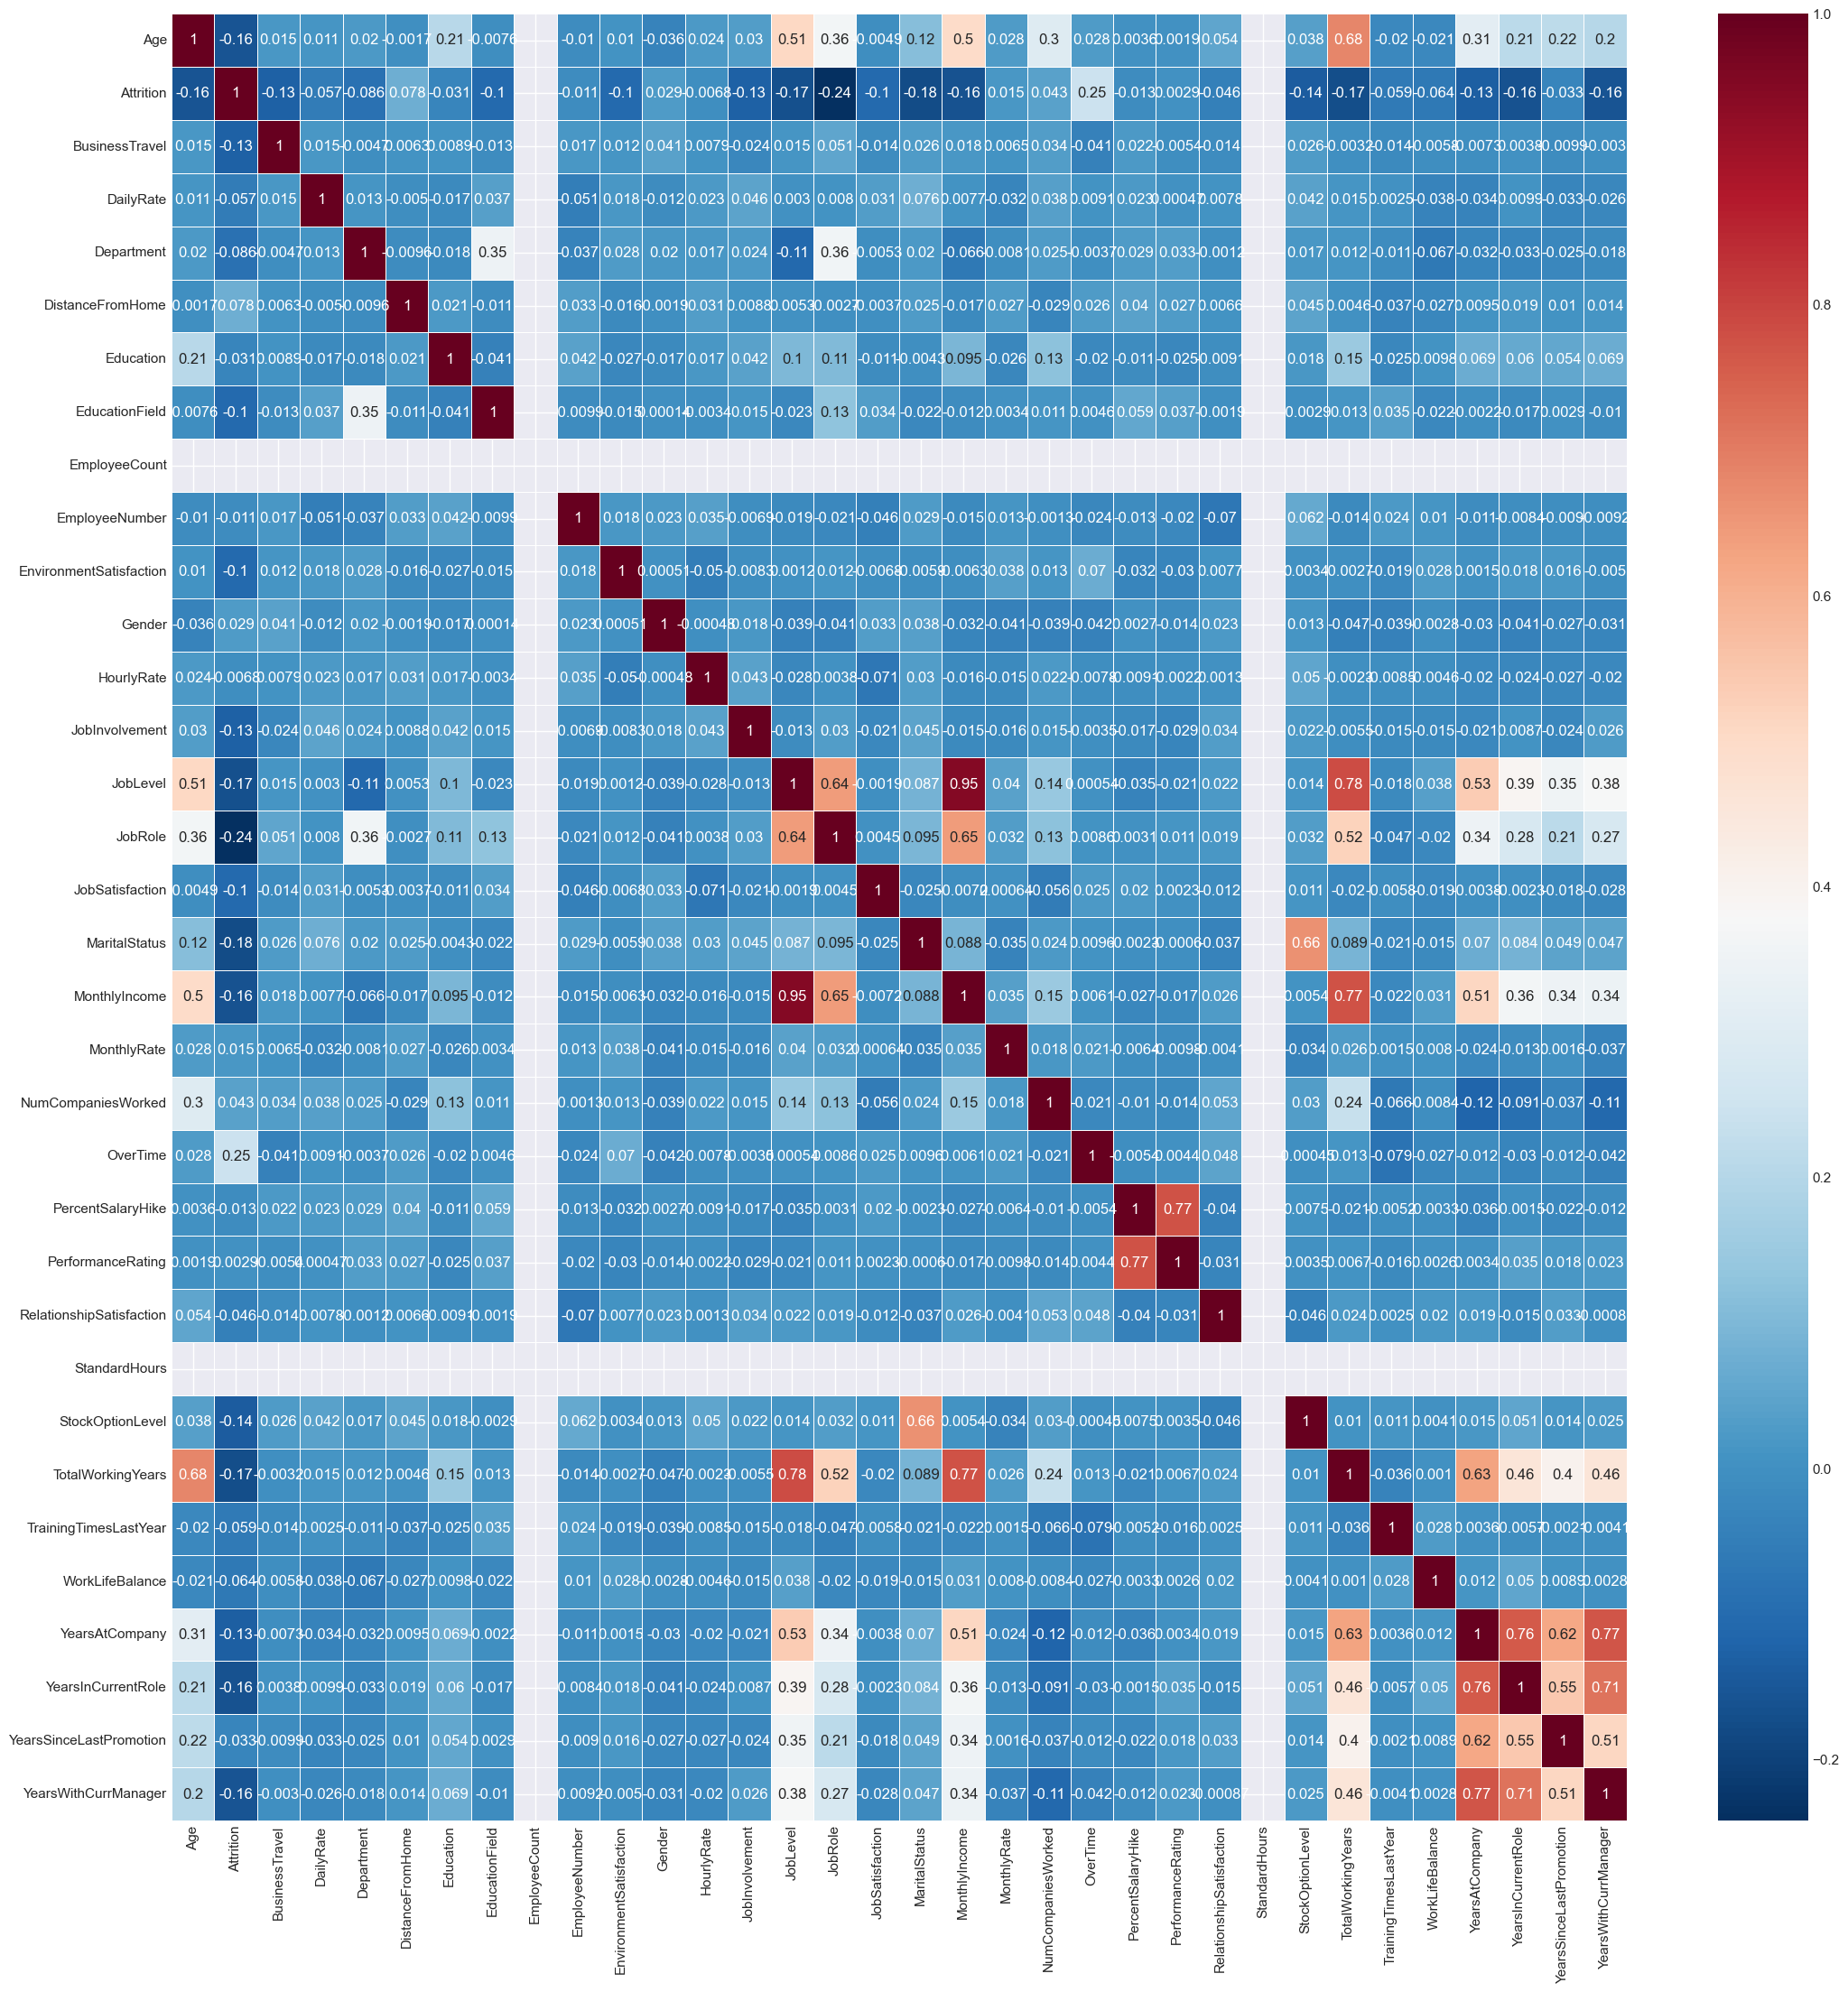

In [85]:
non_numeric_columns = df2.select_dtypes(include=['object']).columns
df2_encoded = pd.get_dummies(df2, drop_first=True)

pearson = df2_encoded.corr(method='pearson')
pearson
plt.figure(figsize=(26, 26))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [86]:
df3 = df2[['Attrition', 'Age', 'BusinessTravel', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]

In [87]:

x = df3.drop('Attrition', axis = 1)
y = df3['Attrition']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1176, 16) (1176,)
Test set: (294, 16) (294,)


In [88]:
LR = LogisticRegression(C=1.0, solver='newton-cg', max_iter=800, random_state=86).fit(x_train,y_train)
LR

LogisticRegression(max_iter=800, random_state=86, solver='newton-cg')

In [89]:
yhat_train = LR.predict(x_train)
yhat_test = LR.predict(x_test)

In [90]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

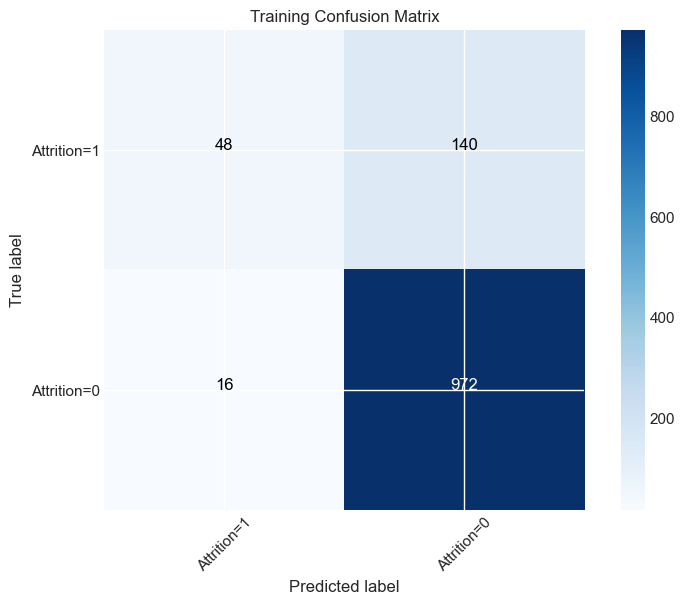

In [91]:
cnf_matrix = confusion_matrix(y_train, yhat_train, labels=[1,0])
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Attrition=1','Attrition=0'], normalize= False,  title='Training Confusion Matrix')

In [92]:
print (classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.87      0.98      0.93       988
           1       0.75      0.26      0.38       188

    accuracy                           0.87      1176
   macro avg       0.81      0.62      0.65      1176
weighted avg       0.85      0.87      0.84      1176



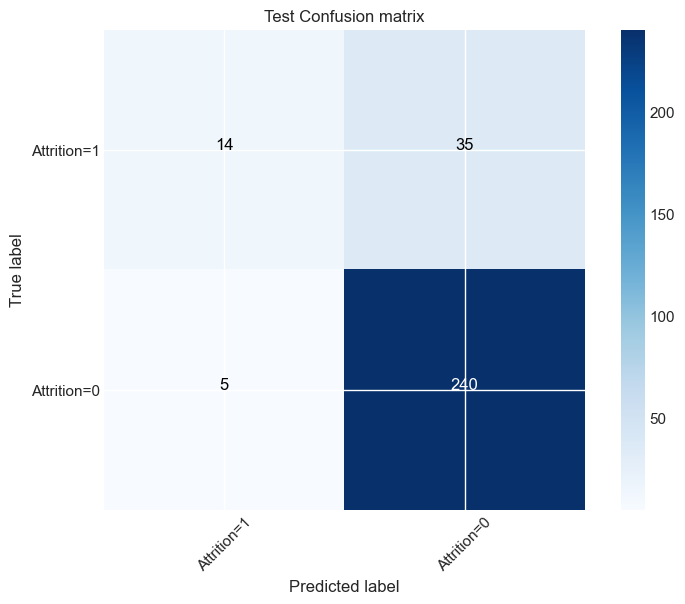

In [93]:
cnf_matrix = confusion_matrix(y_test, yhat_test, labels=[1,0])
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Attrition=1','Attrition=0'],normalize= False,  title='Test Confusion matrix')

In [94]:
print (classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       245
           1       0.74      0.29      0.41        49

    accuracy                           0.86       294
   macro avg       0.80      0.63      0.67       294
weighted avg       0.85      0.86      0.84       294



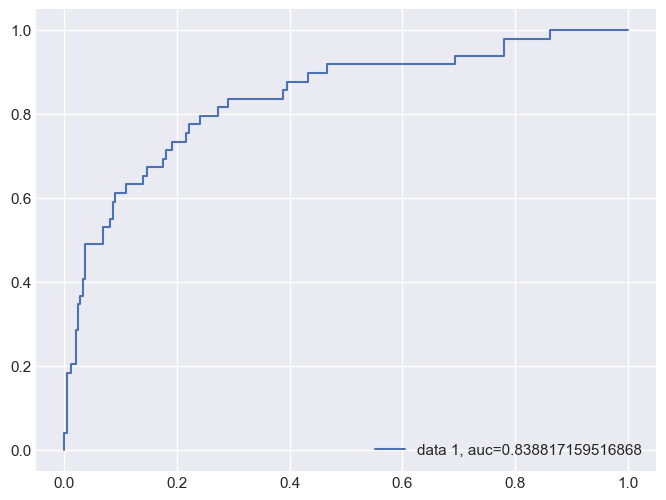

In [95]:
y_pred_proba = LR.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [96]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.352552
         Iterations 7
                            Results: Logit
Model:                Logit              Method:             MLE       
Dependent Variable:   Attrition          Pseudo R-squared:   0.202     
Date:                 2024-07-02 09:39   AIC:                1068.5037 
No. Observations:     1470               BIC:                1153.1920 
Df Model:             15                 Log-Likelihood:     -518.25   
Df Residuals:         1454               LL-Null:            -649.29   
Converged:            1.0000             LLR p-value:        4.0102e-47
No. Iterations:       7.0000             Scale:              1.0000    
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Age                     -0.0109   0.0119 -0.9159 0.3597 -0.0342

In [97]:
df4 = df3[['Attrition', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'OverTime', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]


In [98]:
x1 = df4.drop('Attrition', axis = 1)
y1 = df4['Attrition']

In [99]:
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.356714
         Iterations 7
                            Results: Logit
Model:                Logit              Method:             MLE       
Dependent Variable:   Attrition          Pseudo R-squared:   0.192     
Date:                 2024-07-02 09:39   AIC:                1068.7397 
No. Observations:     1470               BIC:                1121.6698 
Df Model:             9                  Log-Likelihood:     -524.37   
Df Residuals:         1460               LL-Null:            -649.29   
Converged:            1.0000             LLR p-value:        1.0767e-48
No. Iterations:       7.0000             Scale:              1.0000    
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
EducationField           6.3565   0.9490  6.6983 0.0000  4.4966

In [100]:
df5 = df3[['Attrition', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'OverTime', 'StockOptionLevel', 'YearsInCurrentRole', 'YearsWithCurrManager']]

In [101]:
x1 = df5.drop('Attrition', axis = 1)
y1 = df5['Attrition']

In [102]:
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.357260
         Iterations 7
                            Results: Logit
Model:                Logit              Method:             MLE       
Dependent Variable:   Attrition          Pseudo R-squared:   0.191     
Date:                 2024-07-02 09:39   AIC:                1068.3445 
No. Observations:     1470               BIC:                1115.9817 
Df Model:             8                  Log-Likelihood:     -525.17   
Df Residuals:         1461               LL-Null:            -649.29   
Converged:            1.0000             LLR p-value:        4.0707e-49
No. Iterations:       7.0000             Scale:              1.0000    
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
EducationField           6.2164   0.9411  6.6056 0.0000  4.3719

In [103]:
df6 = df3[['Attrition', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'OverTime', 'StockOptionLevel']]


In [104]:
x1 = df6.drop('Attrition', axis = 1)
y1 = df6['Attrition']


In [105]:
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.363654
         Iterations 7
                            Results: Logit
Model:                Logit              Method:             MLE       
Dependent Variable:   Attrition          Pseudo R-squared:   0.177     
Date:                 2024-07-02 09:39   AIC:                1083.1425 
No. Observations:     1470               BIC:                1120.1936 
Df Model:             6                  Log-Likelihood:     -534.57   
Df Residuals:         1463               LL-Null:            -649.29   
Converged:            1.0000             LLR p-value:        1.0081e-46
No. Iterations:       7.0000             Scale:              1.0000    
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
EducationField           6.7398   0.9304  7.2437 0.0000  4.9162